# STA130 HW03 - Gabriel George

## Pre-lecture

### 1 Use [`fig.add_[h/v]line()`](https://plotly.com/python/horizontal-vertical-shapes/) and [`fig.add_[h/v]rect()`](https://plotly.com/python/line-charts/) to mark, respectively, location (mean and median) and scale (range, interquartile range, and a range defined by two standard deviations away from the mean in both directions) of `flipper_length_mm` for each `species` onto `plotly` histograms of `flipper_length_mm` for each `species` in the penguins dataset

In [13]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the penguins dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Remove rows with missing 'flipper_length_mm'
penguins = penguins.dropna(subset=['flipper_length_mm'])

# Create a function to add lines and rectangles for each species
def add_annotations(fig, species_data, species_name):
    # Mean and median
    mean_fl = species_data['flipper_length_mm'].mean()
    median_fl = species_data['flipper_length_mm'].median()

    # Scale calculations
    min_fl = species_data['flipper_length_mm'].min()
    max_fl = species_data['flipper_length_mm'].max()
    q1_fl = species_data['flipper_length_mm'].quantile(0.25)
    q3_fl = species_data['flipper_length_mm'].quantile(0.75)
    std_fl = species_data['flipper_length_mm'].std()

    # Add mean (vertical line)
    fig.add_vline(x=mean_fl, line_width=2, line_dash="dash", line_color="blue",
                  annotation_text=f"Mean ({species_name}): {mean_fl:.2f}", annotation_position="top left")

    # Add median (vertical line)
    fig.add_vline(x=median_fl, line_width=2, line_dash="dash", line_color="green",
                  annotation_text=f"Median ({species_name}): {median_fl:.2f}", annotation_position="top right")

    # Add range (rectangle)
    fig.add_vrect(x0=min_fl, x1=max_fl, fillcolor="lightblue", opacity=0.3,
                  annotation_text=f"Range ({species_name})", annotation_position="bottom left")

    # Add interquartile range (rectangle)
    fig.add_vrect(x0=q1_fl, x1=q3_fl, fillcolor="lightgreen", opacity=0.4,
                  annotation_text=f"IQR ({species_name})", annotation_position="bottom right")

    # Add ±2 standard deviations (rectangle)
    fig.add_vrect(x0=mean_fl - 2 * std_fl, x1=mean_fl + 2 * std_fl, fillcolor="lightpink", opacity=0.2,
                  annotation_text="±2 Std Dev", annotation_position="bottom")

# Create histograms for each species
for species in penguins['species'].unique():
    species_data = penguins[penguins['species'] == species]

    # Plot histogram for the current species
    fig = px.histogram(species_data, x='flipper_length_mm', nbins=30, title=f'Flipper Length Histogram: {species}',
                       labels={'flipper_length_mm': 'Flipper Length (mm)'}, opacity=0.7)

    # Add annotations (mean, median, range, IQR, ±2 std dev)
    add_annotations(fig, species_data, species)

    # Show the figure
    fig.show(renderer="png")

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


In [11]:
!pip install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.1 MB/s eta 0:00:00


### 2 Transition your ChatBot session from the previous problem to repeat the previous problem, but this time using [`seaborn` **kernel density estimation** (KDE) plots](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) to produce the desired figures organized in row of three plots

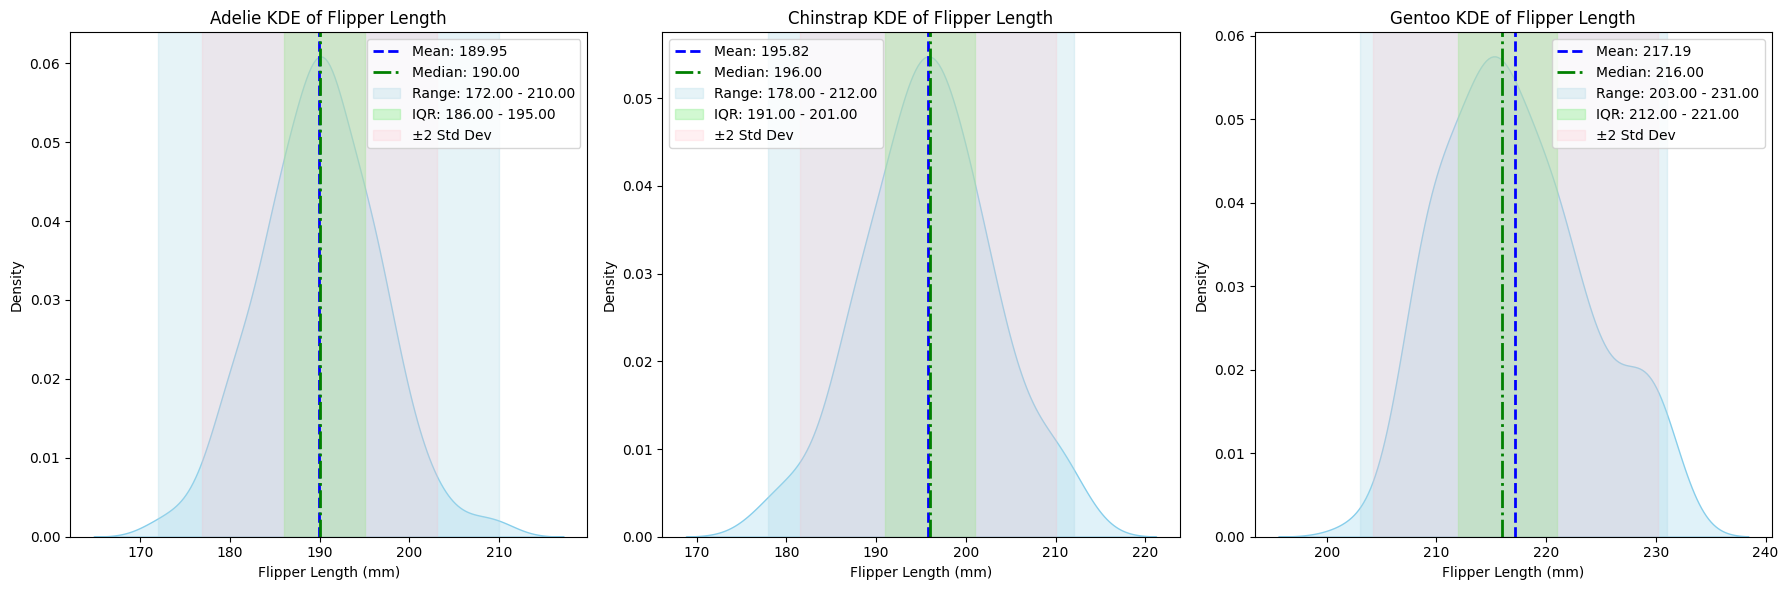

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the penguins dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Remove rows with missing 'flipper_length_mm'
penguins = penguins.dropna(subset=['flipper_length_mm'])

# Create a function to add lines and shaded regions for each species
def add_annotations(ax, species_data, species_name):
    # Mean and median
    mean_fl = species_data['flipper_length_mm'].mean()
    median_fl = species_data['flipper_length_mm'].median()

    # Scale calculations
    min_fl = species_data['flipper_length_mm'].min()
    max_fl = species_data['flipper_length_mm'].max()
    q1_fl = species_data['flipper_length_mm'].quantile(0.25)
    q3_fl = species_data['flipper_length_mm'].quantile(0.75)
    std_fl = species_data['flipper_length_mm'].std()

    # Add mean (vertical line)
    ax.axvline(mean_fl, color='blue', linestyle='--', linewidth=2, label=f"Mean: {mean_fl:.2f}")

    # Add median (vertical line)
    ax.axvline(median_fl, color='green', linestyle='-.', linewidth=2, label=f"Median: {median_fl:.2f}")

    # Add range (shaded region)
    ax.axvspan(min_fl, max_fl, color='lightblue', alpha=0.3, label=f"Range: {min_fl:.2f} - {max_fl:.2f}")

    # Add interquartile range (shaded region)
    ax.axvspan(q1_fl, q3_fl, color='lightgreen', alpha=0.4, label=f"IQR: {q1_fl:.2f} - {q3_fl:.2f}")

    # Add ±2 standard deviations (shaded region)
    ax.axvspan(mean_fl - 2 * std_fl, mean_fl + 2 * std_fl, color='lightpink', alpha=0.2, label="±2 Std Dev")

    # Set titles and labels
    ax.set_title(f'{species_name} KDE of Flipper Length')
    ax.set_xlabel('Flipper Length (mm)')
    ax.set_ylabel('Density')
    ax.legend()

# Create subplots for the three species
species_list = penguins['species'].dropna().unique()
fig, axes = plt.subplots(1, len(species_list), figsize=(18, 6))

# Create KDE plots for each species
for i, species in enumerate(species_list):
    species_data = penguins[penguins['species'] == species]

    # Plot KDE for the current species
    sns.kdeplot(data=species_data, x='flipper_length_mm', fill=True, ax=axes[i], color='skyblue')

    # Add annotations (mean, median, range, IQR, ±2 std dev)
    add_annotations(axes[i], species_data, species)

# Adjust layout
plt.tight_layout()
plt.show()


### 3. Search online for some images of **box plots**, **histograms**, and **kernel density estimators** (perhaps for the same data set); describe to a ChatBot what you think the contrasting descriptions of these three \"data distribution\" visualization methods are; and then see if the ChatBot agrees and what \"pros and cons\" list of these three \"data distribution\" visualization methods your ChatBot can come up with; finally, describe your preference for one or the other and your rationale for this preference

**Box Plot:**

Pros:

Quickly shows key statistics (median, quartiles, range)
Easily identifies outliers
Good for comparing multiple datasets side by side
Works well with large datasets

Cons:

Doesn't show the shape of the distribution
Can hide multimodal distributions
Loses detail in very large datasets

**Histogram:**

Pros:

Shows the shape and modality of the distribution
Easy to understand for most audiences
Good for identifying peaks and gaps in data

Cons:

Bin width choice can significantly affect appearance
Can be sensitive to outliers
May not represent continuous data well with small sample sizes

**Kernel Density Estimator (KDE):**

Pros:

Provides a smooth, continuous estimate of the distribution
Not affected by bin width choices
Good for multimodal distributions
Works well for smaller datasets

Cons:

More complex to understand for general audiences
Kernel and bandwidth selection can affect the result
May oversmooth and hide important features in some cases

___

I like the KDE as I can see all the information with one glance instead of having to hover over to see important statistics. It also looks more pleasing.

### 4 Run the code below and look at the resulting figure of distrubutions and then answer the following questions

In [9]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n=1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)

# This code was produced by just making requests to Microsoft Copilot (../CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md)

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


In [ ]:
import numpy as np
import scipy.stats as stats

# Number of samples
n = 1000

# Data generation
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

# Calculate and print mean and variance
datasets = {'Data1': data1, 'Data2': data2, 'Data3': data3, 'Data4': data4}

for name, data in datasets.items():
    mean = np.mean(data)
    variance = np.var(data)
    print(f"{name}: Mean = {mean:.2f}, Variance = {variance:.2f}")


####    1. Which datasets have similar means and similar variances
Dataset Data1 and Data3 appear to be centered around the same value (mean around 5), and they also have similar spread (variance).

####    2. Which datasets have similar means but quite different variances
Data1, Data2, and Data3 have similar means (around 4.89–4.99), but their variances are quite different.

####    3. Which datasets have similar variances but quite different means
Data2 and Data4 have variances that are closer (2.16 and 0.27 respectively), but their means are quite different.

####    4. Which datasets have quite different means and quite different variances
Data1 and Data4


### Prelecture ChatBot Summary

In this session, you provided a dataset from the penguins dataset and requested code to overlay statistical markers (mean, median, range, IQR, and ±2 standard deviations) on **histograms** and **KDE plots**. I provided code for both `plotly` histograms and `seaborn` KDE plots, each highlighting the specified statistical characteristics for different penguin species.

Then we talked about 3 data visualizations: box plots, histograms, and kernel density estimators. Then I listed pros and cons for each.

Lastly, you provided output from code that calculates the mean and variance for four different datasets, and I analyzed how the datasets compare based on their statistical properties.

The session involved generating and analyzing code, with a focus on data visualization and statistical interpretation.

## Post-lecture

### 5 Start a new ChatBot session to explore the general relationship between the *mean* and *median* and "right" and "left" skewness (and why this is); what the following code does and how it works; and then explain (in your own words) the relationship between the *mean* and *median* and "right" and "left" skewness and what causes this, using the code to demonstrate your explanation through a sequence of notebook cells.

In [ ]:
from scipy import stats
import pandas as pd
import numpy as np
import plotly.express as px
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
# USE `fig1.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

sample1.mean()
np.quantile(sample1, [0.5]) # median

sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)

Mean - average of all data

Median - exact middle value

Right skewness - mean greater than median (there is a "tail" going right)

Left skewness - mean less than median (there is a "tail" going right)

Code below:

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

# Set random seed for reproducibility
np.random.seed(42)

# Generate data for three distributions
right_skewed = np.random.lognormal(mean=0, sigma=0.7, size=1000)
left_skewed = -np.random.lognormal(mean=0, sigma=0.7, size=1000)
symmetric = np.random.normal(loc=0, scale=1, size=1000)

# Create a DataFrame
df = pd.DataFrame({
    'Right Skewed': right_skewed,
    'Left Skewed': left_skewed,
    'Symmetric': symmetric
})

# Calculate mean, median, and skewness for each distribution
stats = {}
for col in df.columns:
    stats[col] = {
        'Mean': df[col].mean(),
        'Median': df[col].median(),
        'Skewness': skew(df[col])
    }
    print(f"\n{col} Distribution:")
    print(f"Mean: {stats[col]['Mean']:.2f}")
    print(f"Median: {stats[col]['Median']:.2f}")
    print(f"Skewness: {stats[col]['Skewness']:.2f}")
    if col != "Symmetric":
        print(f"Mean > Median?",round(stats[col]['Mean'],1)>round(stats[col]['Median'],1))

# Set up the plot
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
sns.set_palette("husl")

# Plot KDE for each distribution
for col in df.columns:
    sns.kdeplot(data=df[col], fill=True, label=col)  # Changed 'shade' to 'fill'
    plt.axvline(stats[col]['Mean'], color=sns.color_palette()[list(df.columns).index(col)],
                linestyle='--', label=f'{col} Mean')
    plt.axvline(stats[col]['Median'], color=sns.color_palette()[list(df.columns).index(col)],
                linestyle=':', label=f'{col} Median')

# Customize the plot
plt.title("Comparison of Right-Skewed, Left-Skewed, and Symmetric Distributions", fontsize=16)
plt.xlabel("Value", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

### 6 Go find an interesting dataset and use summary statistics and visualizations to understand and demonstate some interesting aspects of the data

**Interesting Aspects of Data from Cheese Dataset:**


Diversity of Cheeses:

The dataset contains 1,187 unique cheese entries, showcasing a wide variety of cheeses from around the world.

___
Milk Type Variety:

There are 21 different milk types used in cheese production, including some unexpected sources like yak, camel, and even moose milk.
Cow's milk is the most common, used in 696 cheeses, followed by goat (195) and sheep (128) milk.
There are several mixed milk cheeses, combining milk from different animals.
___

United States Dominance:

The United States has the highest number of cheese entries (305), followed by France (169) and Italy (141).
___

Regional Specialties:

Wisconsin is mentioned 67 times in the region column, highlighting its significance in U.S. cheese production.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-06-04/cheeses.csv"
cheese_df = pd.read_csv(url)

# Display basic information about the dataset
print(cheese_df.info())

# Display summary statistics for numerical columns
print(cheese_df.describe())

# Count of cheeses by country (top 10)
country_counts = cheese_df['country'].value_counts().head(10)
print("\nTop 10 countries by number of cheeses:")
print(country_counts)

# Count of cheeses by milk type
milk_counts = cheese_df['milk'].value_counts()
print("\nCheese counts by milk type:")
print(milk_counts)

# Visualizations

# 1. Bar plot of top 10 countries by number of cheeses
plt.figure(figsize=(12, 6))
country_counts.plot(kind='bar')
plt.title('Top 10 Countries by Number of Cheeses')
plt.xlabel('Country')
plt.ylabel('Number of Cheeses')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Pie chart of milk types
plt.figure(figsize=(10, 10))
milk_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Cheese by Milk Type')
plt.ylabel('')
plt.show()

# 3. Box plot of fat content by milk type
# First, convert fat_content to numeric, removing '%' sign if present
cheese_df['fat_content_numeric'] = pd.to_numeric(cheese_df['fat_content'].str.rstrip('%'), errors='coerce')

plt.figure(figsize=(12, 6))
sns.boxplot(x='milk', y='fat_content_numeric', data=cheese_df)
plt.title('Fat Content Distribution by Milk Type')
plt.xlabel('Milk Type')
plt.ylabel('Fat Content (%)')
plt.show()

# 4. Correlation heatmap for numerical columns (if applicable)
numerical_cols = cheese_df.select_dtypes(include=[np.number]).columns
if len(numerical_cols) > 1:
    correlation_matrix = cheese_df[numerical_cols].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap of Numerical Features')
    plt.show()
else:
    print("Insufficient numerical data for correlation heatmap.")

# 5. Stacked bar chart of vegetarian and vegan cheeses by milk type
cheese_df['vegetarian'] = cheese_df['vegetarian'].fillna(False).astype(bool)
cheese_df['vegan'] = cheese_df['vegan'].fillna(False).astype(bool)

veg_data = cheese_df.groupby('milk')[['vegetarian', 'vegan']].sum()
veg_data_percentage = veg_data.div(cheese_df.groupby('milk').size(), axis=0) * 100
veg_data_percentage.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Percentage of Vegetarian and Vegan Cheeses by Milk Type')
plt.xlabel('Milk Type')
plt.ylabel('Percentage')
plt.legend(title='Category', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 6. Word cloud of cheese types (if wordcloud library is available)
try:
    from wordcloud import WordCloud

    cheese_types = cheese_df['type'].dropna().str.split(',').sum()
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(cheese_types))

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Cheese Types')
    plt.show()
except ImportError:
    print("WordCloud library not available. Skipping word cloud visualization.")

# Print some interesting statistics
print(f"\nTotal number of cheeses: {len(cheese_df)}")
print(f"Number of countries: {cheese_df['country'].nunique()}")
print(f"Number of different milk types: {cheese_df['milk'].nunique()}")
print(f"Percentage of vegetarian cheeses: {cheese_df['vegetarian'].mean()*100:.2f}%")
print(f"Percentage of vegan cheeses: {cheese_df['vegan'].mean()*100:.2f}%")

### 7 Watch the classic [Gapminder Video](https://www.youtube.com/watch?v=jbkSRLYSojo), then have a look at the [`plotly` version](https://plotly.com/python/animations/) and recreate the animation (perhaps after optionally exploring and changing the [style](https://plotly.com/python/templates/), if you wish)

In [ ]:
import plotly.express as px

# Load the Gapminder dataset
df = px.data.gapminder()

# Create the scatter plot with animations
fig = px.scatter(df,
                 x="gdpPercap",
                 y="lifeExp",
                 animation_frame="year",
                 animation_group="country",
                 size="pop",
                 color="continent",
                 hover_name="country",
                 log_x=True,
                 size_max=55,
                 range_x=[100,100000],
                 range_y=[25,90])

# Simply change the background color to dark
fig.update_layout(
    plot_bgcolor='rgb(25,25,25)',
    paper_bgcolor='rgb(25,25,25)'
)

# Show the figure
fig.show(renderer="png")

### 8 Provide a second version of the figure from the previous problem where you edit the `fig = px.scatter()` function from the Gapminder code so that `x` is "percent change", `y` is "rank", `size` is "percent", and `color`="sex", `animation_frame` is "year", and `animation_group` and `hover_name` are "name". Then use `size_max=50`, `range_x=[-0.005,0.005])` and remove the `log_x=True` and `range_y` parameters

In [15]:
import pandas as pd
import plotly.express as px

bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')
bn['name'] = bn['name']+" "+bn['sex'] # make identical boy and girl names distinct
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name','year'])
# the next three lines create the increaes or decrease in name prevalence from the last year
bn['percent change'] = bn['percent'].diff()
new_name = [True]+list(bn.name[:-1].values!=bn.name[1:].values)
bn.loc[new_name,'percentage change'] = bn.loc[new_name,'percent']
bn = bn.sort_values('year')
bn = bn[bn.percent>0.001] # restrict to "common" names
fig = px.scatter(bn, x="percent change", y="rank", animation_frame="year", animation_group="name",
                 size="percent", color="sex", hover_name="name",size_max=50, range_x=[-0.005,0.005]) # range_y removed
fig.update_yaxes(autorange='reversed') # this lets us put rank 1 on the top
fig.show(renderer="png")

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


### 9 Have you reviewed the course [wiki-textbook](https://github.com/pointOfive/STA130_ChatGPT/wiki) and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?

Yes.